In [1]:
import pandas as pd
import numpy as np
import os

path_original_data = r"C:\Users\Usuario\Documents\FOLDER_JupyterNotebook\unimi_files\SMML"
df = pd.read_csv(os.path.join(path_original_data, 'processed_scaled_numerical_dataset.csv'), low_memory=False)

In [2]:
# Set the random state for data splitting to a specific value, most of the data saved was computed using the state 1.
set_number = 2

# Print the shape of the DataFrame 'df'
print(df.shape)

# Display the first few rows of the DataFrame 'df'
df.head()

(113549, 11)


,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,73,0.220962,0.628394,-0.721328,0.298800,1.101557,-0.815926,-0.672445,1.078285,0.928984,-1.142994
1,55,-0.916420,-0.847891,-1.896382,-1.794228,0.234607,1.533645,-0.600612,-0.653979,-0.799395,-1.490909
2,57,-0.015315,-0.744089,-1.127618,-0.297440,-0.160432,0.021997,-0.849140,-0.474446,-1.366520,-1.529510
3,71,-0.128536,-1.735968,-2.320198,-2.049645,-0.659502,1.503789,-0.435859,-0.323181,-1.277786,1.987275
4,82,-0.168915,0.293923,-0.793026,-0.286864,-0.229681,0.702936,-0.849140,-0.886924,-1.185194,-0.074292


In [3]:
def ridge_fit(x, y, alpha, predictors, manual_scaling):
    # Check if 'predictors' is empty, and if so, use all columns from 'x'
    if len(predictors) == 0:
        X = x.copy()
    else:
        X = x[predictors].copy()

    y = y.copy()

    # Compute the mean and standard deviation of 'X' for manual scaling
    x_mean = X.mean()
    x_std = X.std()

    # Apply manual scaling to 'X' if required
    if manual_scaling:
        X = (X - x_mean) / x_std

    # Add an intercept column to 'X' for Ridge Regression
    X["intercept"] = 1
    X = X[["intercept"] + predictors]

    # Create the Ridge penalty matrix with alpha and update the first element to 0
    penalty = alpha * np.identity(X.shape[1])
    penalty[0][0] = 0

    # Calculate the coefficients 'B' using Ridge Regression formula
    B = np.linalg.inv(X.T @ X + penalty) @ X.T @ y
    B.index = ["intercept"] + predictors

    return B, x_mean, x_std


def ridge_predict(x, B, predictors, manual_scaling, x_mean, x_std):
    # Check if 'predictors' is empty, and if so, use all columns from 'x'
    if len(predictors) == 0:
        test_x = x.copy()
    else:
        test_x = x[predictors].copy()

    # Apply manual scaling to 'X' if required
    if manual_scaling:
        test_x = (test_x - x_mean) / x_std

    # Add an intercept column to 'test_x' for Ridge Regression
    test_x["intercept"] = 1
    test_x = test_x[["intercept"] + predictors]

    # Make predictions using the Ridge Regression coefficients 'B'
    predictions = test_x @ B

    return predictions


def correlation(dataset, threshold):
    correlated_columns = set()
    correlation_matrix = dataset.corr()

    # Find pairs of highly correlated columns based on the threshold
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                print(f'- Column 1: {correlation_matrix.columns[i]}, Column 2: {correlation_matrix.columns[j]}')
                colname = correlation_matrix.columns[i]
                correlated_columns.add(colname)
    print()

    return correlated_columns


def model(name):
    # Fit the specified model ('name') to the training data
    name.fit(dx_train, dy_trainL)
    # Make predictions on the test data
    prediction = name.predict(dx_test)
    # Calculate residuals
    residual = dy_testL - prediction

    # Plot the actual vs. predicted values and residual distribution
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(dy_testL, prediction)

    plt.subplot(1, 2, 2)
    sns.distplot(residual, hist=False, kde=True)
    plt.show()


## Select predictors features

In [4]:
# Set the target variable (output) to 'popularity'
output = "popularity"

# Create the input DataFrame (dx) by dropping the 'popularity' column from the original DataFrame (df)
dx = df.drop([output], axis=1)

# Create the target Series (dy) containing the 'popularity' values from the original DataFrame (df)
dy = df[output]

# Create a list of input features (columns) in the DataFrame dx
inputs = list(dx.columns)
print(f'Original features: {inputs}\n')

# Set the regularization parameter (lamba_var) to 2
lamba_var = 2

# Import the train_test_split function from scikit-learn to split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the input DataFrame (dx) and target Series (dy) into training and testing sets
# The training set will contain 80% of the data, and the random state is set to 'set_number' for reproducibility
dx_train, dx_test, dy_train, dy_test = train_test_split(dx, dy, test_size=0.2, random_state=set_number)

Original features: ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']



### Remove the input predictors correlated with each other.

### Train a model using libraries for comparision

In [5]:
# Create the DataFrame 'dxL' by dropping the 'popularity' column from the original DataFrame 'df'
dxL = df.drop(['popularity'], axis=1)

# Create the Series 'dyL' containing only the 'popularity' values from the original DataFrame 'df'
dyL = df['popularity']

# Import the train_test_split function from scikit-learn to split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the input DataFrame 'dxL' and target Series 'dyL' into training and testing sets
# The training set will contain 80% of the data, and the random state is set to 'set_number' for reproducibility
dx_trainL, dx_testL, dy_trainL, dy_testL = train_test_split(dxL, dyL, test_size=0.2, random_state=set_number)

# Print the shapes of the training and testing sets for input features and output/target variable
print(f'Training set: {dx_trainL.shape}, Test set: {dx_testL.shape}')
print(f'Training output: {dy_trainL.shape}, Test output: {dy_testL.shape}\n')

# Use only the input predictor features identified as non-correlated
# Update the training and testing sets with the selected input features
dx_trainL = dx_trainL[inputs]
dx_testL = dx_testL[inputs]

# Check for missing values (NaN) in the training set after selecting the input features
missing_values_count = dx_trainL.isna().sum()
print(missing_values_count)

Training set: (90839, 10), Test set: (22710, 10)
Training output: (90839,), Test output: (22710,)

duration_ms         0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64


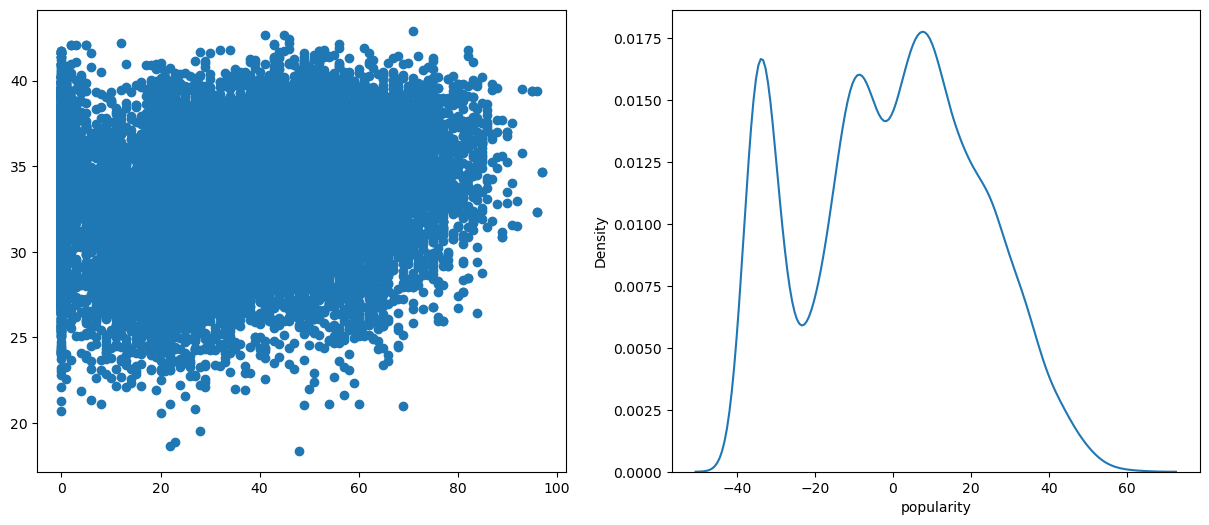

In [6]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

ridge = Ridge()

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

model(ridge)

## Run both models side by side

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

# Lists to store the MSE, ABMSE, and R2 score for the library model and custom models
MSE = []
ABMSE = []
R2_score = []

# Run the library model (using the predefined 'ridge' model)
prediction = ridge.predict(dx_test)
mse = mean_squared_error(dy_testL, prediction)
abmse = mean_absolute_error(dy_testL, prediction)
score = r2_score(dy_testL, prediction)
MSE.append(mse)
ABMSE.append(abmse)
R2_score.append(score)

# Run the custom Ridge Regression models for different alpha values

# Generate two sequences of alpha values: 10**i and each element of (10**i * 5) for i in range(-2, 4)
alphas_1 = [10**i for i in range(-2, 4)]
alphas_2 = [alpha * 5 for alpha in alphas_1]

# Combine the two sequences and order them in ascending order to get a final list of alpha values
combined_alphas = sorted(alphas_1 + alphas_2)

# Set the variable 'alphas' to the list of combined alpha values
alphas = combined_alphas

# Print the combined alpha values
print(combined_alphas)

# Iterate over the alpha values to run the custom Ridge Regression models
for alpha in alphas:
    # Fit the custom Ridge Regression model and get the coefficients, mean, and standard deviation
    B, x_mean, x_std = ridge_fit(dx_train, dy_train, alpha, inputs, False)  # Without 'inputs' will use all columns
    
    # Make predictions using the custom Ridge Regression model
    predictions = ridge_predict(dx_test, B, inputs, False, x_mean, x_std)  # Without 'inputs' will use all columns
    
    # Calculate the MSE, ABMSE, and R2 score for the predictions and store them in the corresponding lists
    mse = mean_squared_error(dy_test, predictions)
    abmse = mean_absolute_error(dy_test, predictions)
    score = r2_score(dy_test, predictions)
    MSE.append(mse)
    ABMSE.append(abmse)
    R2_score.append(score)


[0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000]


In [8]:
# Initialize lists to store model names, distribution information, and evaluation metrics
name_of_set = "Testing set"
algosname = [name_of_set + ' reference']  # Model names (start with the reference model)
setinfo = [set_number]  # Distribution information (e.g., set number)

# Append the model names and distribution information for each alpha value in the 'alphas' list
for alpha in alphas:
    algosname.append(f"{name_of_set}")  # Model names for custom models
    setinfo.append(set_number)  # Distribution information for custom models

# If the number of alphas is less than the number of model names, add a reference lambda column with a default value of 1
if len(alphas) < len(algosname):
    print('Filling lambda column...')
    alphas = [1] + alphas

# Read the existing metrics DataFrame from the file 'numerical_metrics_alternative.csv'
df_metrics = pd.read_csv(os.path.join(path_original_data, 'numerical_metrics_alternative.csv'), low_memory=False)

# Create a new DataFrame 'metrics' with the evaluation metrics for the custom models
metrics = pd.DataFrame(
    list(zip(algosname, setinfo, alphas, MSE, ABMSE, R2_score)),
    columns=['Model', 'Distribution', 'Lambda', 'MSE', 'ABMSE', 'R2_score']
)

# Append the 'metrics' DataFrame to the existing 'df_metrics' DataFrame
combined_df = df_metrics.append(metrics, ignore_index=True)
# ...uncomment this to store the results on the dataset
# combined_df.to_csv(os.path.join(path_original_data, 'numerical_metrics_alternative.csv'), index=False)

# Display the final combined DataFrame
# ...use this to see the full set of metrics
# combined_df
# ...use this to avoid printing the full list
metrics 

Filling lambda column...


,Model,Distribution,Lambda,MSE,ABMSE,R2_score
0,Testing set reference,2,1.00,489.919335,18.457682,0.019032
1,Testing set,2,0.01,489.919399,18.457676,0.019031
2,Testing set,2,0.05,489.919397,18.457676,0.019031
3,Testing set,2,0.10,489.919393,18.457677,0.019032
4,Testing set,2,0.50,489.919367,18.457679,0.019032
5,Testing set,2,1.00,489.919335,18.457682,0.019032
6,Testing set,2,5.00,489.919074,18.457707,0.019032
7,Testing set,2,10.00,489.918749,18.457737,0.019033
8,Testing set,2,50.00,489.916162,18.457980,0.019038
9,Testing set,2,100.00,489.912966,18.458284,0.019044
